# Introduction to Regression with neural netrowks in Tensor FLow

There are many definitions for a regression problem but in our case we are going to keep it simple : Predicting a numerical variable based on other variables even shorter prediting a number.


In [48]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.9.2


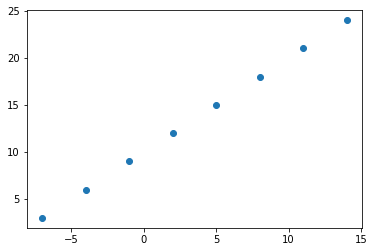

In [49]:
## Creating some data to view and fit
import numpy as np 
import matplotlib.pyplot as plt
# Creating features
x = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualise it
plt.scatter(x,y);

In [50]:
y==x+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [51]:
# This is the relation between our inputs and outputs


### Lets Check out our input and output shape

In [52]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [53]:
input_shape = x.shape
output_shape  = y.shape
input_shape,output_shape

((8,), (8,))

In [54]:
# Turn our numpy arrays into tensors
x = tf.constant(x)
y = tf.constant(y)
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [55]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

## Step in modeling with tensor flow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function - the function that tells our function how wrong it is and optimizer that tells our function how to improve itself and evaluation metrics that tells how well is the performance of our model
3. **Fitting a model** - letting the model try to find patterns betwqeen x and y

In [56]:
# Set Randdom Seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.mae,# mean absolute error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# Fit the model
model.fit(tf.expand_dims(x,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 288ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [57]:
# Check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [58]:
# Try and make prediction using our model
y_pred = model.predict([17.0])
y_pred +11

1/1 [==============================] - 0s 52ms/step


array([[23.71602]], dtype=float32)

## Improving Our Model

We can improve our model by altering steps to crete the model

1. **Creating the model** - we might add more layers, increase the number of hidden units (all called neurons) wihtin each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the ** Learning rate** oof the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (given more eaxamples to learn on)

In [59]:
# Lets re build our model 

#1. to Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2 Compile the mdoel
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# 3. Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 283ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [60]:
# Remind our selfs of data 
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [61]:
# Lets see if our models presdiction has improved
model.predict([17.0])

1/1 [==============================] - 0s 156ms/step


array([[29.739855]], dtype=float32)

In [62]:
# Creating the model again with another change
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# Compiling our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)

# Now fit the model
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 464ms/step - loss: 10.5736 - mae: 10.5736
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1236 - mae: 10.1236
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 9.6736 - mae: 9.6736
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.2236 - mae: 9.2236
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 8.7736 - mae: 8.7736
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.3236 - mae: 8.3236
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.8736 - mae: 7.8736
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 7.4236 - mae: 7.4236
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9736 - mae: 6.9736
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.8250 - mae: 6.8250
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.7706 - mae:

In [63]:
# Remindr of what x and y was
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [64]:
model.predict([17.0])

1/1 [==============================] - 0s 162ms/step


array([[27.497076]], dtype=float32)

In [74]:
# Creating the model again with another change
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiling our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# Now fit the model
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 666ms/step - loss: 13.5267 - mae: 13.5267
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 12.9594 - mae: 12.9594
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3983 - mae: 12.3983
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8281 - mae: 11.8281
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2463 - mae: 11.2463
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6465 - mae: 10.6465
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.0294 - mae: 10.0294
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.3938 - mae: 9.3938
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7211 - mae: 8.7211
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.0110 - mae: 8.0110
Epoch 11/100
1/1 [==============================] - 0s 15ms/st

In [75]:
x,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [76]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[31.824465]], dtype=float32)

In [77]:
# Creating the model again with another change
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

# Compiling our model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.1),
    metrics=["mae"]
)

# Now fit the model
model.fit(tf.expand_dims(x,axis=1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 425ms/step - loss: 19.2532 - mae: 19.2532
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 18.6532 - mae: 18.6532
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 18.0532 - mae: 18.0532
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 17.4532 - mae: 17.4532
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 16.8532 - mae: 16.8532
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 16.2532 - mae: 16.2532
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 15.6532 - mae: 15.6532
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 15.0532 - mae: 15.0532
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4532 - mae: 14.4532
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.8532 - mae: 13.8532
Epoch 11/100
1/1 [==============================] - 0s 8ms/st

In [78]:
model.predict([17.0])

1/1 [==============================] - 0s 59ms/step


array([[27.497189]], dtype=float32)

## Evaluating Model

In practice  a typical work flow you go through is

Build amodel -> fit it -> evaluate it -> tweal a model -> fit it -> evaluate it

When it comes to evaluating there are 3 words you should memorize:
   " Visualize,visualize,visualize"
it's good idea to visualize:
   * The data - what data we are working with? What does it look like?
   * The model itself - what does our model looks like ?
   * The Training of a model - how does a model perfoms while it learns
   * The prediction of a model - how do the prediction of a model line up against the ground truth (The orignal labels)?

In [79]:
# Make a biger data set
x = tf.range(-100,100,4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [81]:
y=x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

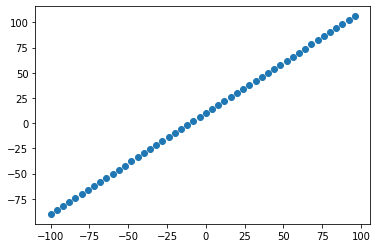

In [83]:
# Visualize the data 
plt.scatter(x,y);

### The 3 sets ....

* Training set - the model learns from this data and it is typicaly 70-80 percent of data.
* Validation set - the model gets tunned on this data which is typically 10 to 15 % of total data
* Test set - The model is evaluated usingf this data

In [85]:
# Check the leanght of how many samples we have
len(x)

50

In [88]:
# Split the data into train and test sets
x_train = x[:40] 
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]
len(x_train),len(x_test),len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing our data
Now lets visualize the sets

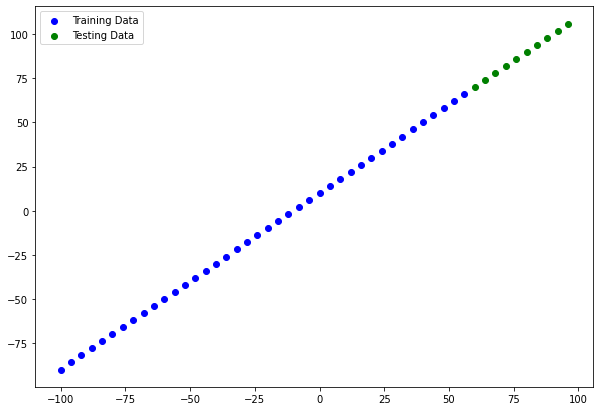

In [94]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(x_train,y_train,c="b",label="Training Data")
plt.scatter(x_test,y_test,c="g",label="Testing Data")
plt.legend()
plt.show()

In [95]:
# Lets have a look at how to build a neural network for our data

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ["mae"]
)
# 3. Fit the model
# model.fit(x_train,y_train,epochs=100)

### Visualizing the model

In [97]:
# Lets create a model that builds automatically by defining the input shape
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])
# 2 compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [101]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total parameters our model is going to learn
* Trainable Pramater 2 means all the parameters in the model are trainable
* Non-Trainable prams these parameters are not trainable 

In [102]:
# Lets fit our model to the trianing data
model.fit(x,y,epochs=100,verbose=0)